In [73]:
# import the packages needed, the latest data and understanding the columns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py
from scipy.interpolate import spline
from IPython.display import YouTubeVideo


# import the data from ECDC
# European CDC site: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# data is available daily and updated between 10pm and 11pm Central European Time.

url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-30.xlsx'
df = pd.read_excel(url, sheet_name=0, header=0, index_col=0)
list_columns = df.columns.values
print(list_columns)
df.rename(columns={'countriesAndTerritories':'country'}, inplace=True)


# extract countries
df_china = df[df['country'] == 'China']
df_france = df[df['country'] == 'France']
df_italy = df[df['country'] == 'Italy']
df_spain = df[df['country'] == 'Spain']
df_usa = df[df['countryterritoryCode'] == 'USA']
df_netherlands = df[df['country'] == 'Netherlands']
df_germany = df[df['country'] == 'Germany']
df_tunisia = df[df['country'] == 'Tunisia']
df_uk = df[df['geoId'] == 'UK']
df_korea = df[df['country'] == 'South_Korea']

df_france.head(5)




# clean up data and outliers
print(df_china.loc['2020-02-14', 'cases'])
print(df_china.loc['2020-02-12', 'cases'])
df_china.loc['2020-02-13', 'cases'] = np.mean([4156, 2028])
print(df_china.loc['2020-02-14', 'deaths'])
print(df_china.loc['2020-02-13', 'deaths'])
df_china.loc['2020-02-13', 'deaths'] = np.mean([13, 254])
df_china.loc['2020-02-14', 'deaths'] = np.mean([13, 254])




['day' 'month' 'year' 'cases' 'deaths' 'countriesAndTerritories' 'geoId'
 'countryterritoryCode' 'popData2018']
dateRep
2020-02-14    4156
Name: cases, dtype: int64
dateRep
2020-02-12    2028
Name: cases, dtype: int64
dateRep
2020-02-14    13
Name: deaths, dtype: int64
dateRep
2020-02-13    254
Name: deaths, dtype: int64


/Users/lindseyholiday/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [81]:
# add data manually if data is available from other source before it appears in the ECDC data

new_row_france = pd.DataFrame({'day': 31, 'month':3, 'year':2020, 
                        'cases':4376, 'deaths':418, 'country':'France', 
                        'geoId':'FR', 'countryterritoryCode':'FRA', 'popData2018':66987244.0}, 
                                                            index =['2020-03-31']) 
df_france = pd.concat([new_row_france, df_france]).reset_index(drop = False) 
df_france.set_index('index',inplace=True)
#df_france.head(5)
#____________________________________________

new_row_italy = pd.DataFrame({'day': 31, 'month':3, 'year':2020, 
                        'cases':4050, 'deaths':812, 'country':'Italy', 
                        'geoId':'It', 'countryterritoryCode':'ITA', 'popData2018':66987244.0}, 
                                                            index =['2020-03-31']) 
df_italy = pd.concat([new_row_italy, df_italy]).reset_index(drop = False) 
df_italy.set_index('index',inplace=True)
#df_italy.head(5)
#____________________________________________


new_row_spain = pd.DataFrame({'day': 31, 'month':3, 'year':2020, 
                        'cases':7846, 'deaths':913, 'country':'Spain', 
                        'geoId':'Sp', 'countryterritoryCode':'SPA', 'popData2018':66987244.0}, 
                                                            index =['2020-03-31']) 
df_spain = pd.concat([new_row_spain, df_spain]).reset_index(drop = False) 
df_spain.set_index('index',inplace=True)
#df_spain.head(5)
#____________________________________________


new_row_usa = pd.DataFrame({'day': 31, 'month':3, 'year':2020, 
                        'cases':20353, 'deaths':573, 'country':'United_States_of_America', 
                        'geoId':'US', 'countryterritoryCode':'USA', 'popData2018':66987244.0}, 
                                                            index =['2020-03-31']) 
df_usa = pd.concat([new_row_usa, df_usa]).reset_index(drop = False) 
df_usa.set_index('index',inplace=True)
#df_us.head(5)
#____________________________________________


new_row_uk = pd.DataFrame({'day': 31, 'month':3, 'year':2020, 
                        'cases':2619, 'deaths':180, 'country':'United_Kingdom', 
                        'geoId':'UK', 'countryterritoryCode':'GBR', 'popData2018':66987244.0}, 
                                                            index =['2020-03-31']) 
df_uk = pd.concat([new_row_uk, df_uk]).reset_index(drop = False) 
df_uk.set_index('index',inplace=True)
#df_spain.head(5)
#____________________________________________

new_row_germany = pd.DataFrame({'day': 31, 'month':3, 'year':2020, 
                        'cases':4450, 'deaths':104, 'country':'Germany', 
                        'geoId':'DE', 'countryterritoryCode':'DEU', 'popData2018':66987244.0}, 
                                                            index =['2020-03-31']) 
df_germany = pd.concat([new_row_germany, df_germany]).reset_index(drop = False) 
df_germany.set_index('index',inplace=True)
#df_spain.head(5)
#____________________________________________


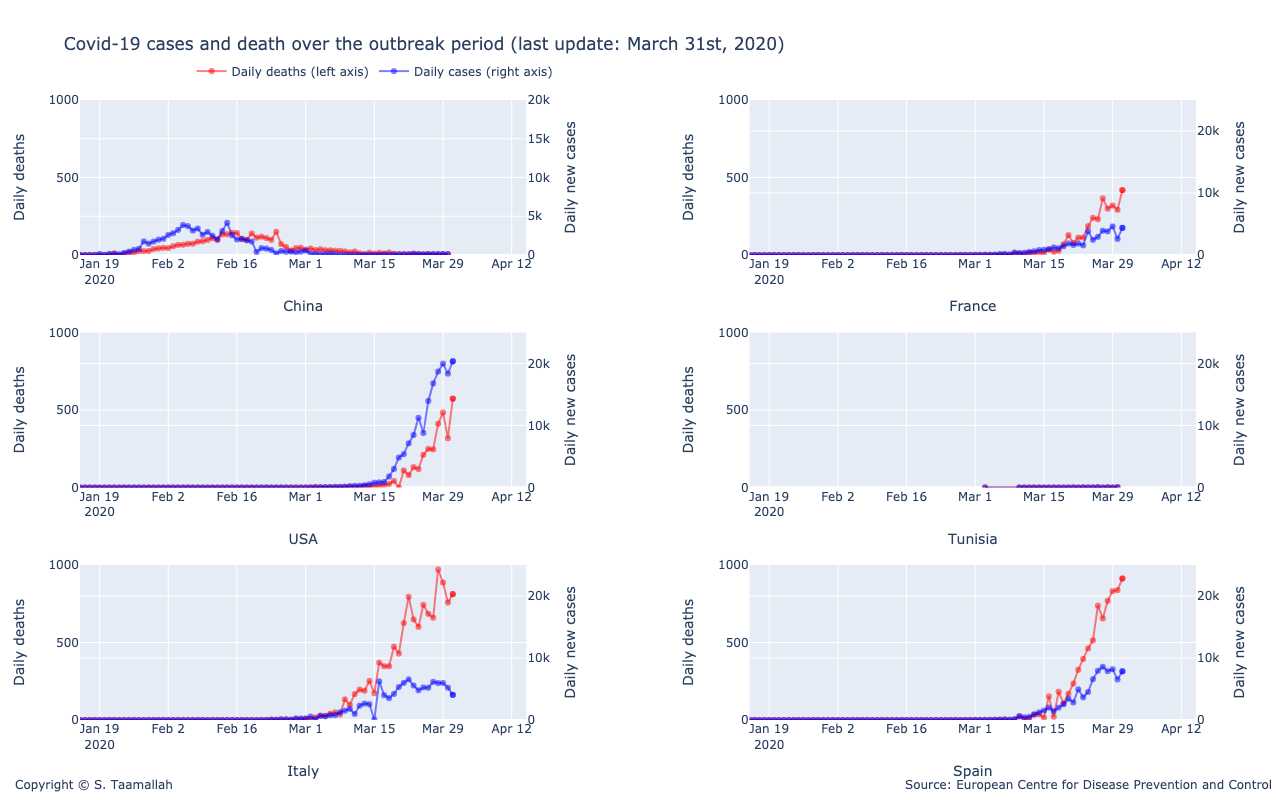

'STaamallah_covid19_analysis_chart_1_20200331.html'

In [176]:
#plotting number of cases and number of deaths for different countries
# all charts using same scale for ease of comparison
# number of death are on the left y-axis. 

# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='lines+markers',
        name='Daily deaths (left axis)',
        line_color='rgba(256, 0, 0, .5)',
)
trace2 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='lines+markers',
        name='Daily cases (right axis)',
        line_color='rgba(0, 0, 256, .5)',
        yaxis='y2'
)
trace3 = go.Scatter(
        x=df_france.index, 
        y=df_france['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        showlegend=False,
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x2',
        yaxis='y3'
)
trace4 = go.Scatter(
        x=df_france.index, 
        y=df_france['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x2',
        yaxis='y4',
        showlegend=False,
)
trace5 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x3',
        yaxis='y5',
        showlegend=False,
)
trace6 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x3',
        yaxis='y6',
        showlegend=False,
)
trace7 = go.Scatter(
        x=df_tunisia.index, 
        y=df_tunisia['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x4',
        yaxis='y7',
        showlegend=False,
)
trace8 = go.Scatter(
        x=df_tunisia.index, 
        y=df_tunisia['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x4',
        yaxis='y8',
        showlegend=False,
)


trace9 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x5',
        yaxis='y9',
        showlegend=False,
)

trace10 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x5',
        yaxis='y10',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['deaths'],
        mode='lines+markers',
        name='Daily deaths',
        line_color='rgba(256, 0, 0, .5)',
        xaxis='x6',
        yaxis='y11',
        showlegend=False,
)
trace12 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['cases'],
        mode='lines+markers',
        name='Daily cases',
        line_color='rgba(0, 0, 256, .5)',
        xaxis='x6',
        yaxis='y12',
        showlegend=False,
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = go.Layout(
    title='Covid-19 cases and death over the outbreak period (last update: March 31st, 2020)',
    legend=dict(x=.1, y=1.07, orientation="h"), 
    width=1100,
    height=800,
    
    annotations=[
        dict(
            x=1.07,
            y=-0.12,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.06,
            y=-0.12,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
    # Top left
    xaxis=dict(
        title='China',
        domain=[0, 0.4],
        range=['2020-01-15', '2020-04-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,1000],
        domain=[0.75, 1],
        anchor='x'
    ),
    yaxis2=dict(
        title = 'Daily new cases',
        #type='log',
        range=[0,20000],
        overlaying='y',
        side='right'
    ),
    

    # Top right
    xaxis2=dict(
        title='France',
        range=['2020-01-15', '2020-04-15'],
        domain=[0.6, 1.0],
        anchor='y3'
    ),
    yaxis3=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.75, 1],
        anchor='x2',
        range=[0,1000],

    ),
    yaxis4=dict(
        title = 'Daily new cases',
        domain=[0.6, 1.0],
        overlaying='y3',
        range=[0,25000],
        side='right',
        anchor='x2'
    ),

    # middle left
    xaxis3=dict(
        title='USA',
        range=['2020-01-15', '2020-04-15'],
        domain=[0, 0.4],
        anchor='y5'
    ),
    yaxis5=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.375, 0.625],
        range=[0,1000],
        anchor='x3'
    ),
    yaxis6=dict(
        title = 'Daily new cases',
        domain=[0.375, 0.625],
        overlaying='y5',
        range=[0,25000],
        side='right',
        anchor='x3'
    ),

    # middle right
    xaxis4=dict(
        title='Tunisia',
        range=['2020-01-15', '2020-04-15'],
        domain=[0.6, 1.0],
        anchor='y7'
    ),
    yaxis7=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0.375, 0.625],
        range=[0,1000],
        anchor='x4'
    ),
    yaxis8=dict(
        title = 'Daily new cases',
        domain=[0.375, 0.625],
        overlaying='y7',
        range=[0,25000],
        side='right',
        anchor='x4'
    ),
    
    # Bottom left
    xaxis5=dict(
        title='Italy',
        range=['2020-01-15', '2020-04-15'],
        domain=[0, 0.4],
        anchor='y9'
    ),
    yaxis9=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0, 0.25],
        range=[0,1000],
        anchor='x5'
    ),
    yaxis10=dict(
        title = 'Daily new cases',
        domain=[0, 0.25],
        overlaying='y9',
        range=[0,25000],
        side='right',
        anchor='x5'
    ),
    
    # Bottom bottom right
    xaxis6=dict(
        title='Spain',
        range=['2020-01-15', '2020-04-15'],
        domain=[0.6, 1.0],
        anchor='y11'
    ),
    yaxis11=dict(
        #type='log',
        title = 'Daily deaths',
        domain=[0, 0.25],
        range=[0,1000],
        anchor='x6'
    ),
    yaxis12=dict(
        title = 'Daily new cases',
        domain=[0, 0.25],
        overlaying='y11',
        range=[0,25000],
        side='right',
        anchor='x6'
    )
    
)


    
fig = go.Figure(data=data, layout=layout)


fig.show()


#py.plot(data, filename = 'basic-line', auto_open=True)

#py.plot(data, filename='privacy-public', sharing='public')

from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_1_20200331.html", auto_open = False)

In [83]:
# function to smooth the data 

def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=np.zeros(len(data))
    for i in range(degree, len(data) - degree):
        point=data[i-degree:i-degree+len(triangle)] * triangle
        smoothed[i] = int(np.sum(point)/np.sum(triangle))
       
        
    # Handle boundaries
    smoothed[:degree] = data[:degree]
    smoothed[-degree:] = data[-degree:]
    return smoothed


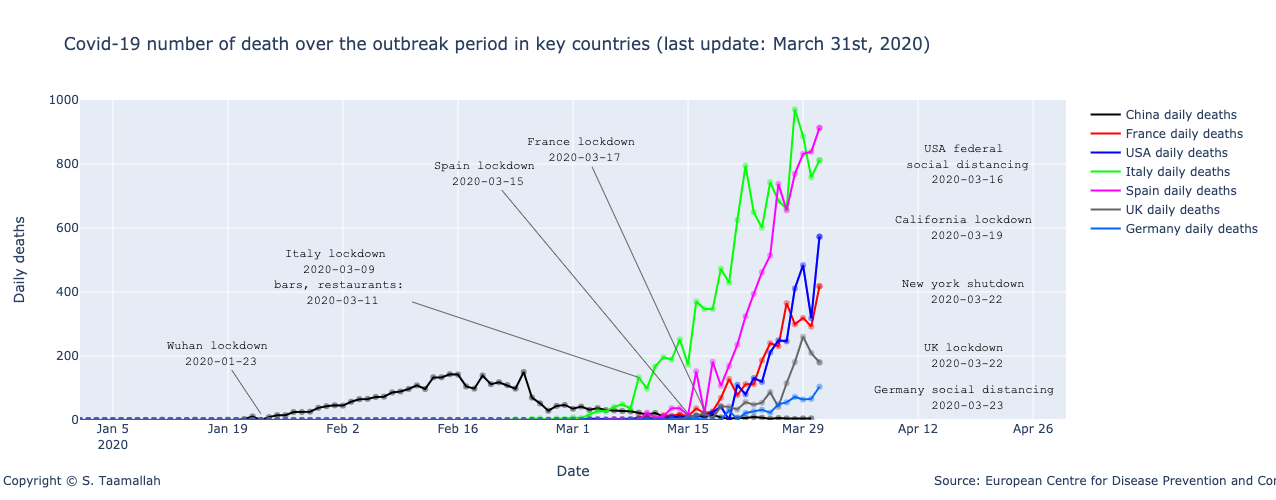

'STaamallah_covid19_analysis_chart_1_20200331.html'

In [179]:
degree = 1

smooth_china = smoothTriangle(df_china['deaths'],degree)
smooth_france = smoothTriangle(df_france['deaths'],degree)
smooth_italy = smoothTriangle(df_italy['deaths'],degree)
smooth_usa = smoothTriangle(df_usa['deaths'],degree)
smooth_uk = smoothTriangle(df_uk['deaths'],degree)
smooth_germany = smoothTriangle(df_germany['deaths'],degree)
smooth_spain = smoothTriangle(df_spain['deaths'],degree)
smooth_korea = smoothTriangle(df_korea['deaths'],degree)
smooth_netherlandss = smoothTriangle(df_netherlands['deaths'],degree)



# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='markers',
        name='China daily deaths',
        line_color='rgba(0, 0, 0, .4)',
        showlegend=False,
)

trace11 = go.Scatter(
        x=df_china.index, 
        y=smooth_china,
        mode='lines',
        name='China daily deaths',
        line_color='rgba(0, 0, 0, 1)',
)


trace2 = go.Scatter(
        x=df_france.index, 
        y=df_france['deaths'],
        mode='markers',
        name='France daily deaths',
        line_color='rgba(256, 0, 0, .4)',
        showlegend=False,
)

trace22 = go.Scatter(
        x=df_france.index, 
        y=smooth_france,
        mode='lines',
        name='France daily deaths',
        line_color='rgba(256, 0, 0, 1)',
)


trace3 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['deaths'],
        mode='lines+markers',
        name='USA daily deaths',
        line_color='rgba(0, 0, 255, .4)',
    showlegend=False,
)

trace33 = go.Scatter(
        x=df_usa.index, 
        y=df_usa['deaths'],
        mode='lines',
        name='USA daily deaths',
        line_color='rgba(0, 0, 255, 1)',
)

trace4 = go.Scatter(
        x=df_italy.index, 
        y=df_italy['deaths'],
        mode='markers',
        name='Italy daily deaths',
        line_color='rgba(0, 256, 0, .4)',
    showlegend=False,
)

trace44 = go.Scatter(
        x=df_italy.index, 
        y=smooth_italy,
        mode='lines',
        name='Italy daily deaths',
        line_color='rgba(0, 256, 0, 1)',
)

trace5 = go.Scatter(
        x=df_spain.index, 
        y=df_spain['deaths'],
        mode='markers',
        name='Spain daily deaths',
        line_color='rgba(255, 0, 255, .4)',
    showlegend=False,
)

trace55 = go.Scatter(
        x=df_spain.index, 
        y=smooth_spain,
        mode='lines',
        name='Spain daily deaths',
        line_color='rgba(256, 0, 256, 1)',
)


trace6 = go.Scatter(
        x=df_uk.index, 
        y=df_uk['deaths'],
        mode='markers',
        name='UK daily deaths',
        line_color='rgba(100, 100, 100, .4)',
    showlegend=False,
)

trace66 = go.Scatter(
        x=df_uk.index, 
        y=smooth_uk,
        mode='lines',
        name='UK daily deaths',
        line_color='rgba(100, 100, 100, 1)',
)

trace7 = go.Scatter(
        x=df_germany.index, 
        y=df_germany['deaths'],
        mode='markers',
        name='Germany daily deaths',
        line_color='rgba(0, 100, 250, .4)',
    showlegend=False,
)

trace77 = go.Scatter(
        x=df_germany.index, 
        y=smooth_germany,
        mode='lines',
        name='Germany daily deaths',
        line_color='rgba(0, 100, 250, 1)',
)


data = [trace1,trace11, trace2, trace22, trace3,trace33,  trace4, trace44, trace5, trace55, trace6, trace66, trace7, trace77]

layout = go.Layout(
    title='Covid-19 number of death over the outbreak period in key countries (last update: March 31st, 2020)',
    width=1100,
    height=500,
    
    # Top left
    xaxis=dict(
        title='Date',
        range=['2020-01-01', '2020-04-30'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,1000],
        anchor='x'
    ),
    
      annotations=[
        dict(
            x=1.24,
            y=-0.22,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.08,
            y=-0.22,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)



fig = go.Figure(data=data, layout=layout)



fig.add_annotation(
        x='2020-01-23',
        y=20,
        xref="x",
        yref="y",
        text="Wuhan lockdown <br> 2020-01-23 ",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-40,
        ay=-60,
        #bordercolor="#c7c7c7",
        #borderwidth=2,
        #borderpad=4,
        #bgcolor="#ff7f0e",
        #opacity=0.8
        )


fig.add_annotation(
        x='2020-03-09',
        y=133,
        xref="x",
        yref="y",
        text="Italy lockdown <br> 2020-03-09 <br> bars, restaurants: <br> 2020-03-11",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-300,
        ay=-100,
        #bordercolor="#c7c7c7",
        #borderwidth=2,
        #borderpad=4,
        #bgcolor="#ff7f0e",
        #opacity=0.8
        )


fig.add_annotation(
            x='2020-03-17',
            y=30,
            text="France lockdown <br> 2020-03-17 ",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-120,
        ay=-260,
)


fig.add_annotation(
            x='2020-03-15',
            y=20,
            text="Spain lockdown <br> 2020-03-15 ",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=-200,
        ay=-240,
)


fig.add_annotation(
            x='2020-04-18',
            y=200,
            text="UK lockdown <br> 2020-03-22 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=150,
        ay=-60,
)

fig.add_annotation(
            x='2020-04-18',
            y=70,
            text="Germany social distancing <br> 2020-03-23 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=150,
        ay=-60,
)

fig.add_annotation(
            x='2020-04-18',
            y=800,
            text="USA federal <br> social distancing <br> 2020-03-16 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=200,
        ay=-120,
)

fig.add_annotation(
            x='2020-04-18',
            y=400,
            text="New york shutdown <br> 2020-03-22 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=200,
        ay=-120,
)



fig.add_annotation(
            x='2020-04-18',
            y=600,
            text="California lockdown <br> 2020-03-19 ",
            showarrow=False,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=200,
        ay=-120,
)






fig.show()

from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_2_20200331.html", auto_open = False)

It seems to be an outlier on Feb 13th. with Feb 13th deaths too high and feb 14th too low. These two will be averaged

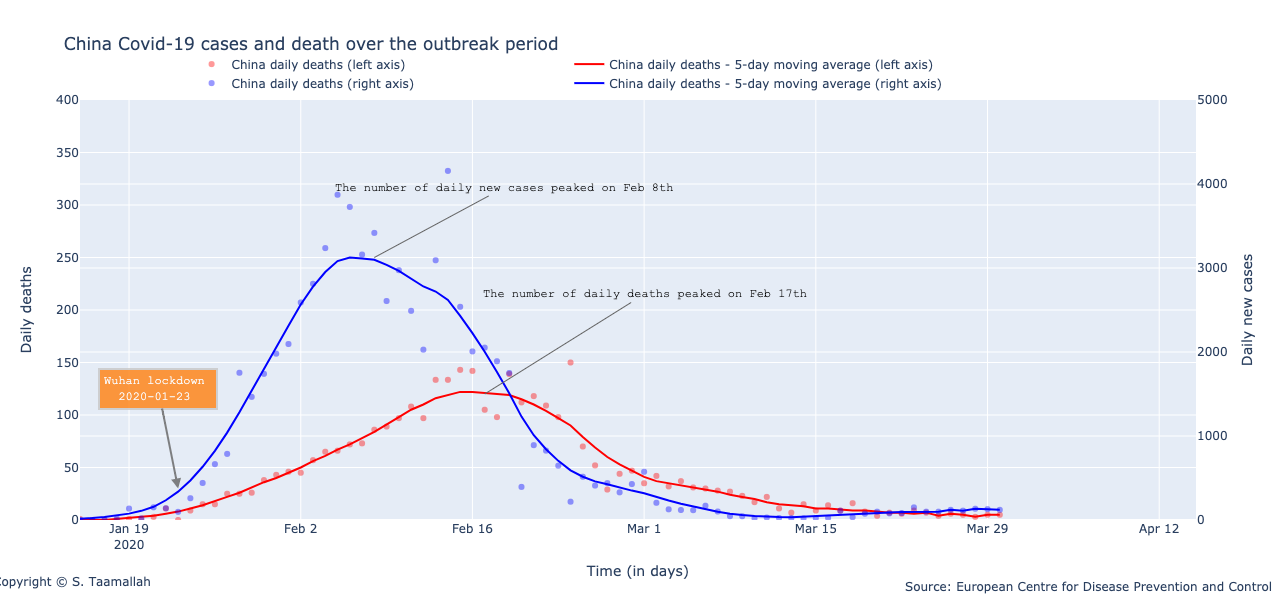

'Sof_covid19_analysis_China_chart_1_20200330.html'

In [188]:
degree = 7

smooth_china_deaths = smoothTriangle(df_china['deaths'],degree)
smooth_china_cases = smoothTriangle(df_china['cases'],degree)




# Add traces
trace1 = go.Scatter(
        x=df_china.index, 
        y=df_china['deaths'],
        mode='markers',
        name='China daily deaths (left y-axis)',
        line_color='rgba(256, 0, 0, .4)',
        #showlegend=False,
)

trace11 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_deaths,
        mode='lines',
        name='China daily deaths - 5-day moving average (left y-axis)',
        line_color='rgba(256, 0, 0, 1)',
)

trace2 = go.Scatter(
        x=df_china.index, 
        y=df_china['cases'],
        mode='markers',
        name='China daily deaths (right y-axis)',
        line_color='rgba(0, 0, 256, .4)',
        #showlegend=False,
        yaxis='y2'
)

trace22 = go.Scatter(
        x=df_china.index, 
        y=smooth_china_cases,
        mode='lines',
        name='China daily deaths - 5-day moving average (right y-axis)',
        line_color='rgba(0, 0, 256, 1)',
        yaxis='y2'
)

data = [trace1, trace11, trace2, trace22]

layout = go.Layout(
    title='China Covid-19 cases and death over the outbreak period',
    legend=dict(x=.1, y=1.12, orientation="h"), 
    width=1100,
    height=600,
    
    # Top left
    xaxis=dict(
        title='Time (in days)',
        range=['2020-01-15', '2020-04-15'],
    ),
    yaxis=dict(
        title='Daily deaths',
        #type='log',
        range=[0,400],
        anchor='x'
    ),
    yaxis2=dict(
        title = 'Daily new cases',
        #type='log',
        range=[0,5000],
        overlaying='y',
        side='right'
    ),
    
       annotations=[
        dict(
            x=1.07,
            y=-0.18,
            showarrow=False,
            text='Source: European Centre for Disease Prevention and Control',
            xref='paper',
            yref='paper'
        ),
        
        dict(
            x=-0.08,
            y=-0.17,
            showarrow=False,
            text='Copyright © S. Taamallah ',
            xref='paper',
            yref='paper'
        )
    ],
    
)



fig = go.Figure(data=data, layout=layout)

fig.add_annotation(
        x='2020-01-23',
        y=30,
        xref="x",
        yref="y",
        text="Wuhan lockdown <br> 2020-01-23  ",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=-20,
        ay=-100,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )


fig.add_annotation(
            x='2020-02-08',
            y=250,
            text="The number of daily new cases peaked on Feb 8th",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=130,
        ay=-70,
)


fig.add_annotation(
            x='2020-02-17',
            y=120,
            text="The number of daily deaths peaked on Feb 17th",
            showarrow=True,
            font=dict(
            family="Courier New, monospace",
            size=12,
            color="black",
            ),
        align="center",
        arrowhead=0,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=160,
        ay=-100,
)

fig.show()

from plotly.offline import plot
plot(fig, filename="STaamallah_covid19_analysis_chart_3_20200331.html", auto_open = False)